In [2]:
from requests import get 
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys 
import re 
reload(sys)
sys.setdefaultencoding('utf8')
%matplotlib inline 

**After importing everything we need, we create a response object and check status of url, 200 = Connection is good**

In [3]:
url = 'https://pokemondb.net/pokedex/all'

response = get(url)

response.status_code

200

**We create a bs4 soup object using BeautifulSoup, and passing in our response object + 'lxml' parser**

In [4]:
soup = BeautifulSoup(response.content, 'lxml')
type(soup)

bs4.BeautifulSoup

**Create a rows variable to store all the table rows.<br>If the website had multiple tables or other 'tr' classes...we would have to create a container to hold all the rows and then create a rows variable by using find_all on container<br> But in this case there is only one table, that holds all the 'tr' tags**

In [5]:
rows = soup.find_all('tr')

**Create empty lists of each column, and itterate through the rows variable skipping the first one ([1:]) <br>
Set 'col' variable to all the 'td' tags contained in each row in rows. <br>
Set each column to its appropriate name, get the text and then append it to the appropriate empty list**

In [6]:
numbers = []
names = []
types = []
totals = []
hps = []
attacks = []
defenses = []
sp_attks = []
sp_defs = []
speeds = [] 
for row in rows[1:]:
    col = row.find_all('td')
    num = col[0].text
    numbers.append(num)
   
    name = col[1].text
    names.append(name)
    
    poke_type = col[2].text
    types.append(poke_type)
    
    total = col[3].text
    totals.append(total)
    
    hp = col[4].text
    hps.append(hp)
    
    attack = col[5].text
    attacks.append(attack)
    
    defense = col[6].text
    defenses.append(defense)
    
    spa = col[7].text
    sp_attks.append(spa)
    
    spd = col[8].text
    sp_defs.append(spd)
    
    speed = col[9].text
    speeds.append(speed)
    
 

**Create Pandas DataFrame using the lists of data scraped from website, by entering the lists into pandas as a dictionary**

In [7]:
poke_df = pd.DataFrame({'Number':numbers,
                        'Name':names,
                        'Type':types,
                        'Total':totals,
                        'HP':hps,
                       'Attack':attacks,
                       'Defense':defenses,
                       'Sp_Attk':sp_attks,
                       'Sp_Def':sp_defs,
                       'Speed':speeds})
poke_df.head()

,Attack,Defense,HP,Name,Number,Sp_Attk,Sp_Def,Speed,Total,Type
0,49,49,45,Bulbasaur,001,65,65,45,318,GrassPoison
1,62,63,60,Ivysaur,002,80,80,60,405,GrassPoison
2,82,83,80,Venusaur,003,100,100,80,525,GrassPoison
3,100,123,80,VenusaurMega Venusaur,003,122,120,80,625,GrassPoison
4,52,43,39,Charmander,004,60,50,65,309,Fire


**Columns seem out of place, so we reoder them**
- Using df = df[['column','column2'....'etc']]

In [8]:
poke_df = poke_df[['Number','Name','Type','Total','HP','Attack','Defense','Sp_Attk','Sp_Def','Speed']]

In [9]:
poke_df.head()

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Attk,Sp_Def,Speed
0,001,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
1,002,Ivysaur,GrassPoison,405,60,62,63,80,80,60
2,003,Venusaur,GrassPoison,525,80,82,83,100,100,80
3,003,VenusaurMega Venusaur,GrassPoison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65


**Save file to desktop as CSV**

In [28]:
poke_df.to_csv('poke_data.csv')


In [10]:
def camelcase_split(string):
    split_string = re.sub('([a-z])([A-Z])', r'\1 \2', string).split()
    return split_string

In [11]:
poke_df['Type'] = poke_df.Type.apply(camelcase_split)

In [12]:
poke_df.head()

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Attk,Sp_Def,Speed
0,001,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
1,002,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
2,003,Venusaur,"[Grass, Poison]",525,80,82,83,100,100,80
3,003,VenusaurMega Venusaur,"[Grass, Poison]",625,80,100,123,122,120,80
4,004,Charmander,[Fire],309,39,52,43,60,50,65


**Create a function that takes a argument and checks if the length is equal to 1. <br> If so it adds a 'None' to the list values, so we have 2 elements in each list**

In [13]:
def add_none(type_2):
    if len(type_2) == 1:
        type_2.append('None')
    return type_2 


In [13]:
poke_df.head()

,Number,Name,Type,Total,HP,Attack,Defense,Sp_Attk,Sp_Def,Speed
0,001,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
1,002,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
2,003,Venusaur,"[Grass, Poison]",525,80,82,83,100,100,80
3,003,VenusaurMega Venusaur,"[Grass, Poison]",625,80,100,123,122,120,80
4,004,Charmander,[Fire],309,39,52,43,60,50,65


In [19]:
poke_df['Type'] = poke_df.Type.apply(add_none)

**We take the 'Type' column of DataFrame and set it equal to variable. <br> Then use a for loop to go through each row and add i[0] and i[1] to two seperate lists that we will use as new columns**

In [20]:
type1_2 = poke_df['Type']
split_cols
type_1 = []
type_2 = []
for i in type1_2:
    type_1.append(i[0])
    type_2.append(i[1])
    


In [17]:
idx = 2
poke_df.insert(loc=idx,column='Type_1',value=type_1)
#poke_df.insert(loc=idx,column='Type_2',value=type_2)

In [21]:
poke_df.head()

,Number,Name,Type_1,Type,Type_2,Total,HP,Attack,Defense,Sp_Attk,Sp_Def,Speed
0,001,Bulbasaur,Grass,"[Grass, Poison]",Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass,"[Grass, Poison]",Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass,"[Grass, Poison]",Poison,525,80,82,83,100,100,80
3,003,VenusaurMega Venusaur,Grass,"[Grass, Poison]",Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,"[Fire, None]",None,309,39,52,43,60,50,65


**We have our two types in seperate columns now, now we get rid of the unneeded 'Type' column**

In [22]:
poke_df.drop('Type', axis=1, inplace=True)

In [23]:
poke_df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Attk,Sp_Def,Speed
0,001,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,003,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,None,309,39,52,43,60,50,65


(array([ 30.,  86., 170., 100., 143., 234.,  63.,  61.,  32.,   7.]),
 array([175. , 235.5, 296. , 356.5, 417. , 477.5, 538. , 598.5, 659. ,
        719.5, 780. ]),
 <a list of 10 Patch objects>)

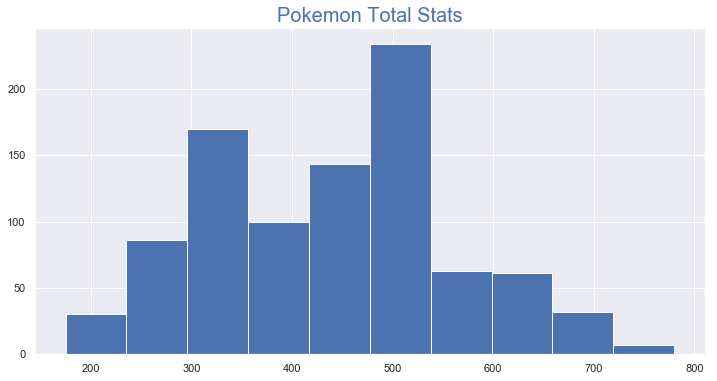

In [26]:
sns.set()
poke_df['Total'] = poke_df.Total.astype(int)

plt.figure(figsize=(12,6))
plt.title("Pokemon Total Stats", fontsize=20, color= 'b')
plt.hist(poke_df['Total'])

**Histogram to shows that very few pokemon have a total score of below 200 and above 700**<br> -Next we will check the HP frequency 

(array([ 12., 231., 391., 217.,  54.,  13.,   3.,   1.,   2.,   2.]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

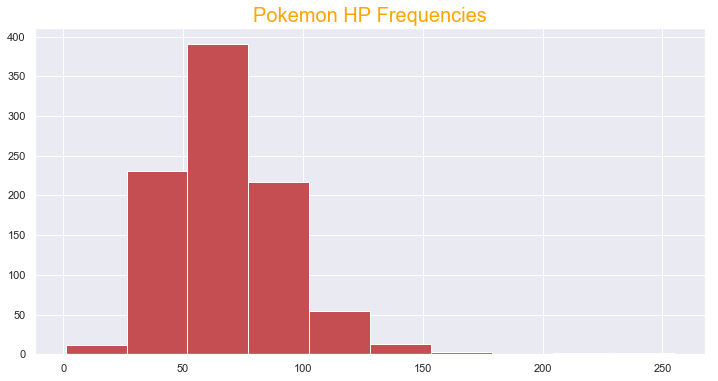

In [28]:
poke_df['HP'] = poke_df.HP.astype(int)

plt.figure(figsize=(12,6))
plt.title("Pokemon HP Frequencies", fontsize=20,color='Orange')
plt.hist(poke_df['HP'],color='r')

**HP histogram shows that most pokemon in our dataset have an HP between 25-125** 

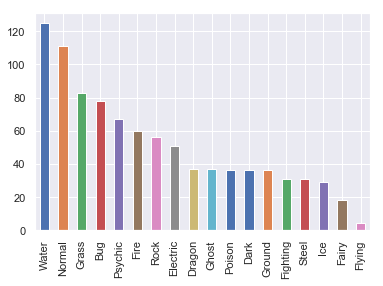

In [30]:
poke_df.Type_1.value_counts().plot.bar()

**Quick plot of type_1 from dataset shows how many of each type exist in our data<br> we can observe that Ground, Dragon, and Dark have similar amounts of pokemon<br> We want to see how thier total stats are in comparison to each other**

Text(0.5,1,'Ground-Dragon-Dark Total Stats Frequencies')

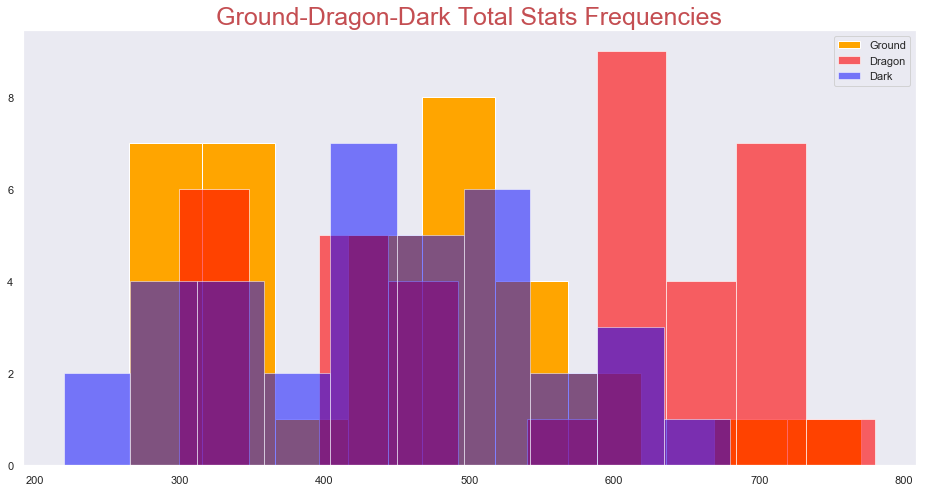

In [45]:
type_ground = poke_df[poke_df['Type_1'] == 'Ground']
type_dragon = poke_df[poke_df['Type_1'] == 'Dragon']
type_dark = poke_df[poke_df['Type_1'] == 'Dark']

plt.figure(figsize=(16,8))
plt.grid(False)
plt.hist(type_ground['Total'], label='Ground', color = 'orange')
plt.hist(type_dragon['Total'], label='Dragon', color = 'red', alpha=.6)
plt.hist(type_dark['Total'], label='Dark', color = 'blue', alpha=.5)
plt.legend(loc='upper right')
plt.title("Ground-Dragon-Dark Total Stats Frequencies", fontsize=25, color='r')

**From out histogram plot we can see the Dragon type_1 holds higher values of total stats than the other two**